## Dataset Description

This dataset contains [**real crime incidents in the City of Los Angeles**](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) from 2020 to the present.  
It is provided by the **Los Angeles Police Department (LAPD)** as an official government dataset.  

- The data is transcribed from original crime reports.  
- Some location fields may appear as (0°, 0°) when information is missing.  
- Addresses are shown only to the nearest hundred block to protect privacy.  
- Since **March 7, 2024**, LAPD has been transitioning to a new Records Management System to comply with the FBI’s **NIBRS** reporting standard.  
- Updates were weekly before January 2024, but during system issues, they became bi-weekly.  

This makes the dataset an **authentic and reliable source of crime information** directly from the City of Los Angeles government.  

DR_NO → Unique crime report number.

Date Rptd → Date when the crime was reported.

DATE OCC → Date when the crime happened.

TIME OCC → Time when the crime happened.

AREA → Numeric code of the police area.

AREA NAME → Name of the police area.

Rpt Dist No → Reporting police district number.

Part 1-2 → Crime category (Part 1 or Part 2).

Crm Cd → Numeric crime code.

Crm Cd Desc → Description of the crime.

Mocodes → Codes for crime method (modus operandi).

Vict Age → Age of the victim.

Vict Sex → Gender of the victim (M/F).

Vict Descent → Ethnicity/race of the victim.

Premis Cd → Numeric code of crime location.

Premis Desc → Description of crime location.

Weapon Used Cd → Numeric code of weapon used.

Weapon Desc → Description of weapon used.

Status → Code for case status.

Status Desc → Description of case status.

Crm Cd 1 → Primary crime code.

Crm Cd 2 → Secondary crime code.

Crm Cd 3 → Third crime code.

Crm Cd 4 → Fourth crime code.

LOCATION → Address or location of the crime.

Cross Street → Street intersecting the location.

LAT → Latitude coordinate.

LON → Longitude coordinate

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import pickle

# Understanding the Dataset

In [2]:
df = pd.read_csv(r'Crime_Data_from_2020_to_Present.csv')

In [3]:
df.shape

(1004991, 28)

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [5]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [7]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

C:\Users\mena1\AppData\Local\Temp\ipykernel_11196\2642274927.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
C:\Users\mena1\AppData\Local\Temp\ipykernel_11196\2642274927.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])


In [9]:
df['day_of_week OCC'] = df['DATE OCC'].dt.day_of_week
df['Year OCC'] = df['DATE OCC'].dt.year
df['Month OCC'] = df['DATE OCC'].dt.month
df['Day OCC'] = df['DATE OCC'].dt.day

df['day_of_week Rptd'] = df['Date Rptd'].dt.day_of_week
df['Year Rptd'] = df['Date Rptd'].dt.year
df['Month Rptd'] = df['Date Rptd'].dt.month
df['Day Rptd'] = df['Date Rptd'].dt.day

In [10]:
df['Hour OCC'] = df['TIME OCC'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

In [11]:
df['Hour OCC']

0           8
1          18
2          12
3          13
4          18
           ..
1004986     1
1004987    10
1004988    15
1004989    16
1004990    12
Name: Hour OCC, Length: 1004991, dtype: int64

# Handling Null & Duplicated Values

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isna().sum().sort_values(ascending=False).head(13)

Crm Cd 4          1004927
Crm Cd 3          1002677
Crm Cd 2           935831
Cross Street       850755
Weapon Desc        677744
Weapon Used Cd     677744
Mocodes            151619
Vict Descent       144656
Vict Sex           144644
Premis Desc           588
Premis Cd              16
Crm Cd 1               11
Status                  1
dtype: int64

In [14]:
df = df.drop(['Crm Cd','Crm Cd 2','Crm Cd 3','Crm Cd 4', 'Cross Street','Premis Desc','Mocodes'], axis=1)

In [15]:
df = df.dropna(subset=['Status','Crm Cd 1','Premis Cd'])

In [16]:
df.isna().sum().sort_values(ascending=False).head(6)

Weapon Used Cd    677720
Weapon Desc       677720
Vict Descent      144640
Vict Sex          144628
DR_NO                  0
DATE OCC               0
dtype: int64

In [17]:
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(0)
df['Weapon Desc'] = df['Weapon Desc'].fillna('No Weapon')
df['Vict Descent'] = df['Vict Descent'].fillna('Other')

In [18]:
df['Vict Sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-'], dtype=object)

In [19]:
df['Vict Sex'] = df['Vict Sex'].replace({'M':0, 'F':1, 'H':2, 'X':3})

In [20]:
X = df.drop('Part 1-2', axis=1)
y = df['Part 1-2']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [22]:
X_train.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'day_of_week OCC', 'Year OCC',
       'Month OCC', 'Day OCC', 'day_of_week Rptd', 'Year Rptd', 'Month Rptd',
       'Day Rptd', 'Hour OCC'],
      dtype='object')

In [23]:
X_train['Vict Sex'] = X_train['Vict Sex'].replace({'-':np.nan})
X_test['Vict Sex'] = X_test['Vict Sex'].replace({'-':np.nan})
X_train['Vict Sex'] = X_train['Vict Sex'].astype(float)
X_test['Vict Sex'] = X_test['Vict Sex'].astype(float)

C:\Users\mena1\AppData\Local\Temp\ipykernel_11196\4020054682.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Vict Sex'] = X_train['Vict Sex'].replace({'-':np.nan})
C:\Users\mena1\AppData\Local\Temp\ipykernel_11196\4020054682.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Vict Sex'] = X_test['Vict Sex'].replace({'-':np.nan})


In [24]:
iter_imputer1 = IterativeImputer(max_iter=15, random_state=42)
num_cols = X_train.select_dtypes(include='number').columns

X_train[num_cols] = iter_imputer1.fit_transform(X_train[num_cols])
X_test[num_cols] = iter_imputer1.transform(X_test[num_cols])

with open("Files/Iterative_imputer_Age.pkl", "wb") as f:
    pickle.dump(iter_imputer1, f)

In [25]:
X_train['Vict Sex'] = X_train['Vict Sex'].round().astype(int)
X_test['Vict Sex'] = X_test['Vict Sex'].round().astype(int)

In [26]:
m = X_train['Vict Sex'] >= 0

X_train = X_train[m]
y_train = y_train[m]

In [27]:
X_train['Vict Sex'].value_counts()

Vict Sex
1    358864
0    323282
3     78429
2     43395
Name: count, dtype: int64

In [28]:
X_train.isna().sum().sort_values(ascending=False).head(2)

DR_NO        0
Date Rptd    0
dtype: int64

In [29]:
X_test.isna().sum().sort_values(ascending=False).head(2)

DR_NO        0
Date Rptd    0
dtype: int64

# Visualization

In [30]:
df_map = df.sample(n=5000, random_state=42)

crime_types = df_map['Crm Cd Desc'].unique()
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
          'beige', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'lightblue', 
          'lightgreen', 'gray', 'black', 'lightgray']

crime_color_map = {crime: random.choice(colors) for crime in crime_types}

m = folium.Map(location=[34.05, -118.25], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df_map.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Crime: {row['Crm Cd Desc']}<br>Date: {row['DATE OCC']}",
        icon=folium.Icon(color=crime_color_map[row['Crm Cd Desc']])
    ).add_to(marker_cluster)

legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 300px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; overflow:auto;">
     &nbsp;<b>Crime Types Legend</b><br>
'''
for crime, color in crime_color_map.items():
    legend_html += f'&nbsp;<i class="fa fa-map-marker fa-2x" style="color:{color}"></i>&nbsp;{crime}<br>'
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

m.save("crime_map.html")
m

import webbrowser
webbrowser.open("crime_map.html")


True

In [31]:
pivot_table = pd.pivot_table(
    df,
    values="Crm Cd 1",
    index=["day_of_week OCC"],
    columns=["Hour OCC"],
    aggfunc="count",
    fill_value=0
)

days_map = {
    0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 
    4: "Fri", 5: "Sat", 6: "Sun"
}
pivot_table.index = pivot_table.index.map(days_map)

pivot_long = pivot_table.reset_index().melt(
    id_vars="day_of_week OCC", 
    var_name="Hour", 
    value_name="Crime_Count"
)

fig = px.density_heatmap(
    pivot_long,
    x="Hour",
    y="day_of_week OCC",
    z="Crime_Count",
    color_continuous_scale="YlOrRd",
    labels={"Crime_Count": "Number of Crimes"},
    title="Crimes by Day of Week x Hour of Day"
)

fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Day of Week",
    width=1000,
    height=500
)

import plotly.io as pio
pio.renderers.default = "browser"
fig.show()


C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\1330646293.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




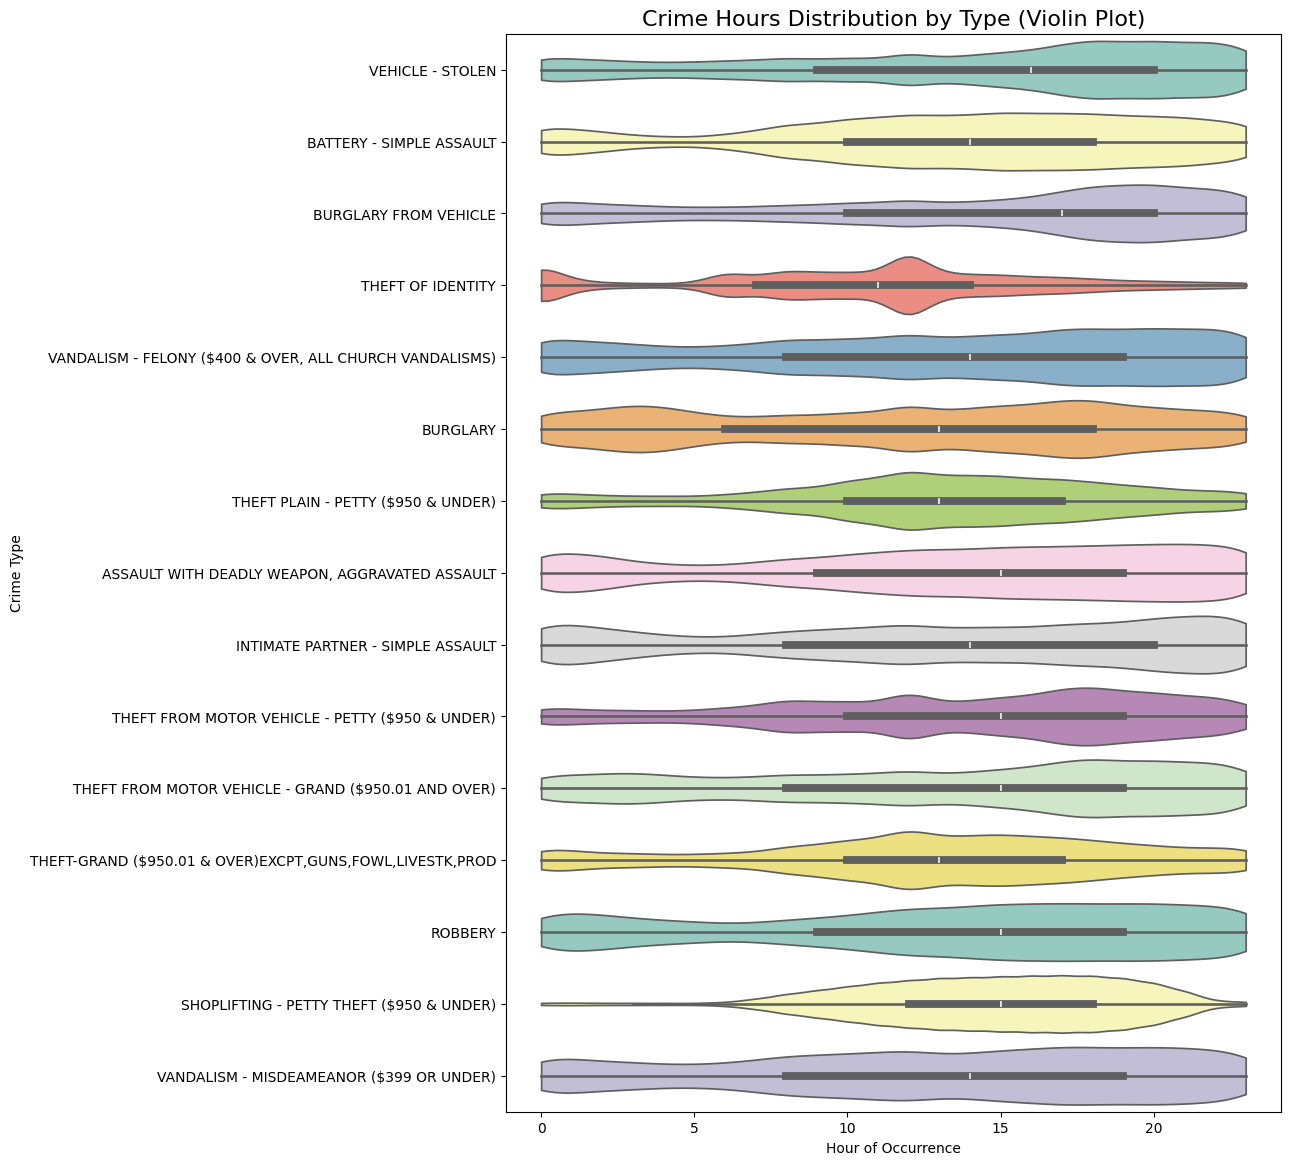

In [32]:
plt.figure(figsize=(10,14))
order = df["Crm Cd Desc"].value_counts().nlargest(15).index

sns.violinplot(
    data=df[df["Crm Cd Desc"].isin(order)],
    y="Crm Cd Desc",
    x="Hour OCC",
    order=order,
    palette="Set3",
    cut=0
)

plt.title("Crime Hours Distribution by Type (Violin Plot)", fontsize=16)
plt.xlabel("Hour of Occurrence")
plt.ylabel("Crime Type")
plt.show()


In [33]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df["year_month"] = df["DATE OCC"].dt.to_period("M").dt.to_timestamp()
crimes_monthly = df.groupby("year_month").size().reset_index(name="count")

In [34]:
fig = px.line(
    crimes_monthly,
    x="year_month",
    y="count",
    markers=True,
    title="Monthly Crime Trend",
    color_discrete_sequence=["#d73027"] 
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Crimes",
    width=1000,
    height=500,
    plot_bgcolor="#fff7cc",   
    paper_bgcolor="#fff2a8",  
    font=dict(color="black"),
    title_font=dict(size=22, color="darkred"),
)

fig.update_xaxes(
    gridcolor="#ffec80", gridwidth=0.8, zerolinecolor="#e6b800"
)
fig.update_yaxes(
    gridcolor="#ffec80", gridwidth=0.8, zerolinecolor="#e6b800"
)

fig.show()

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\428445891.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




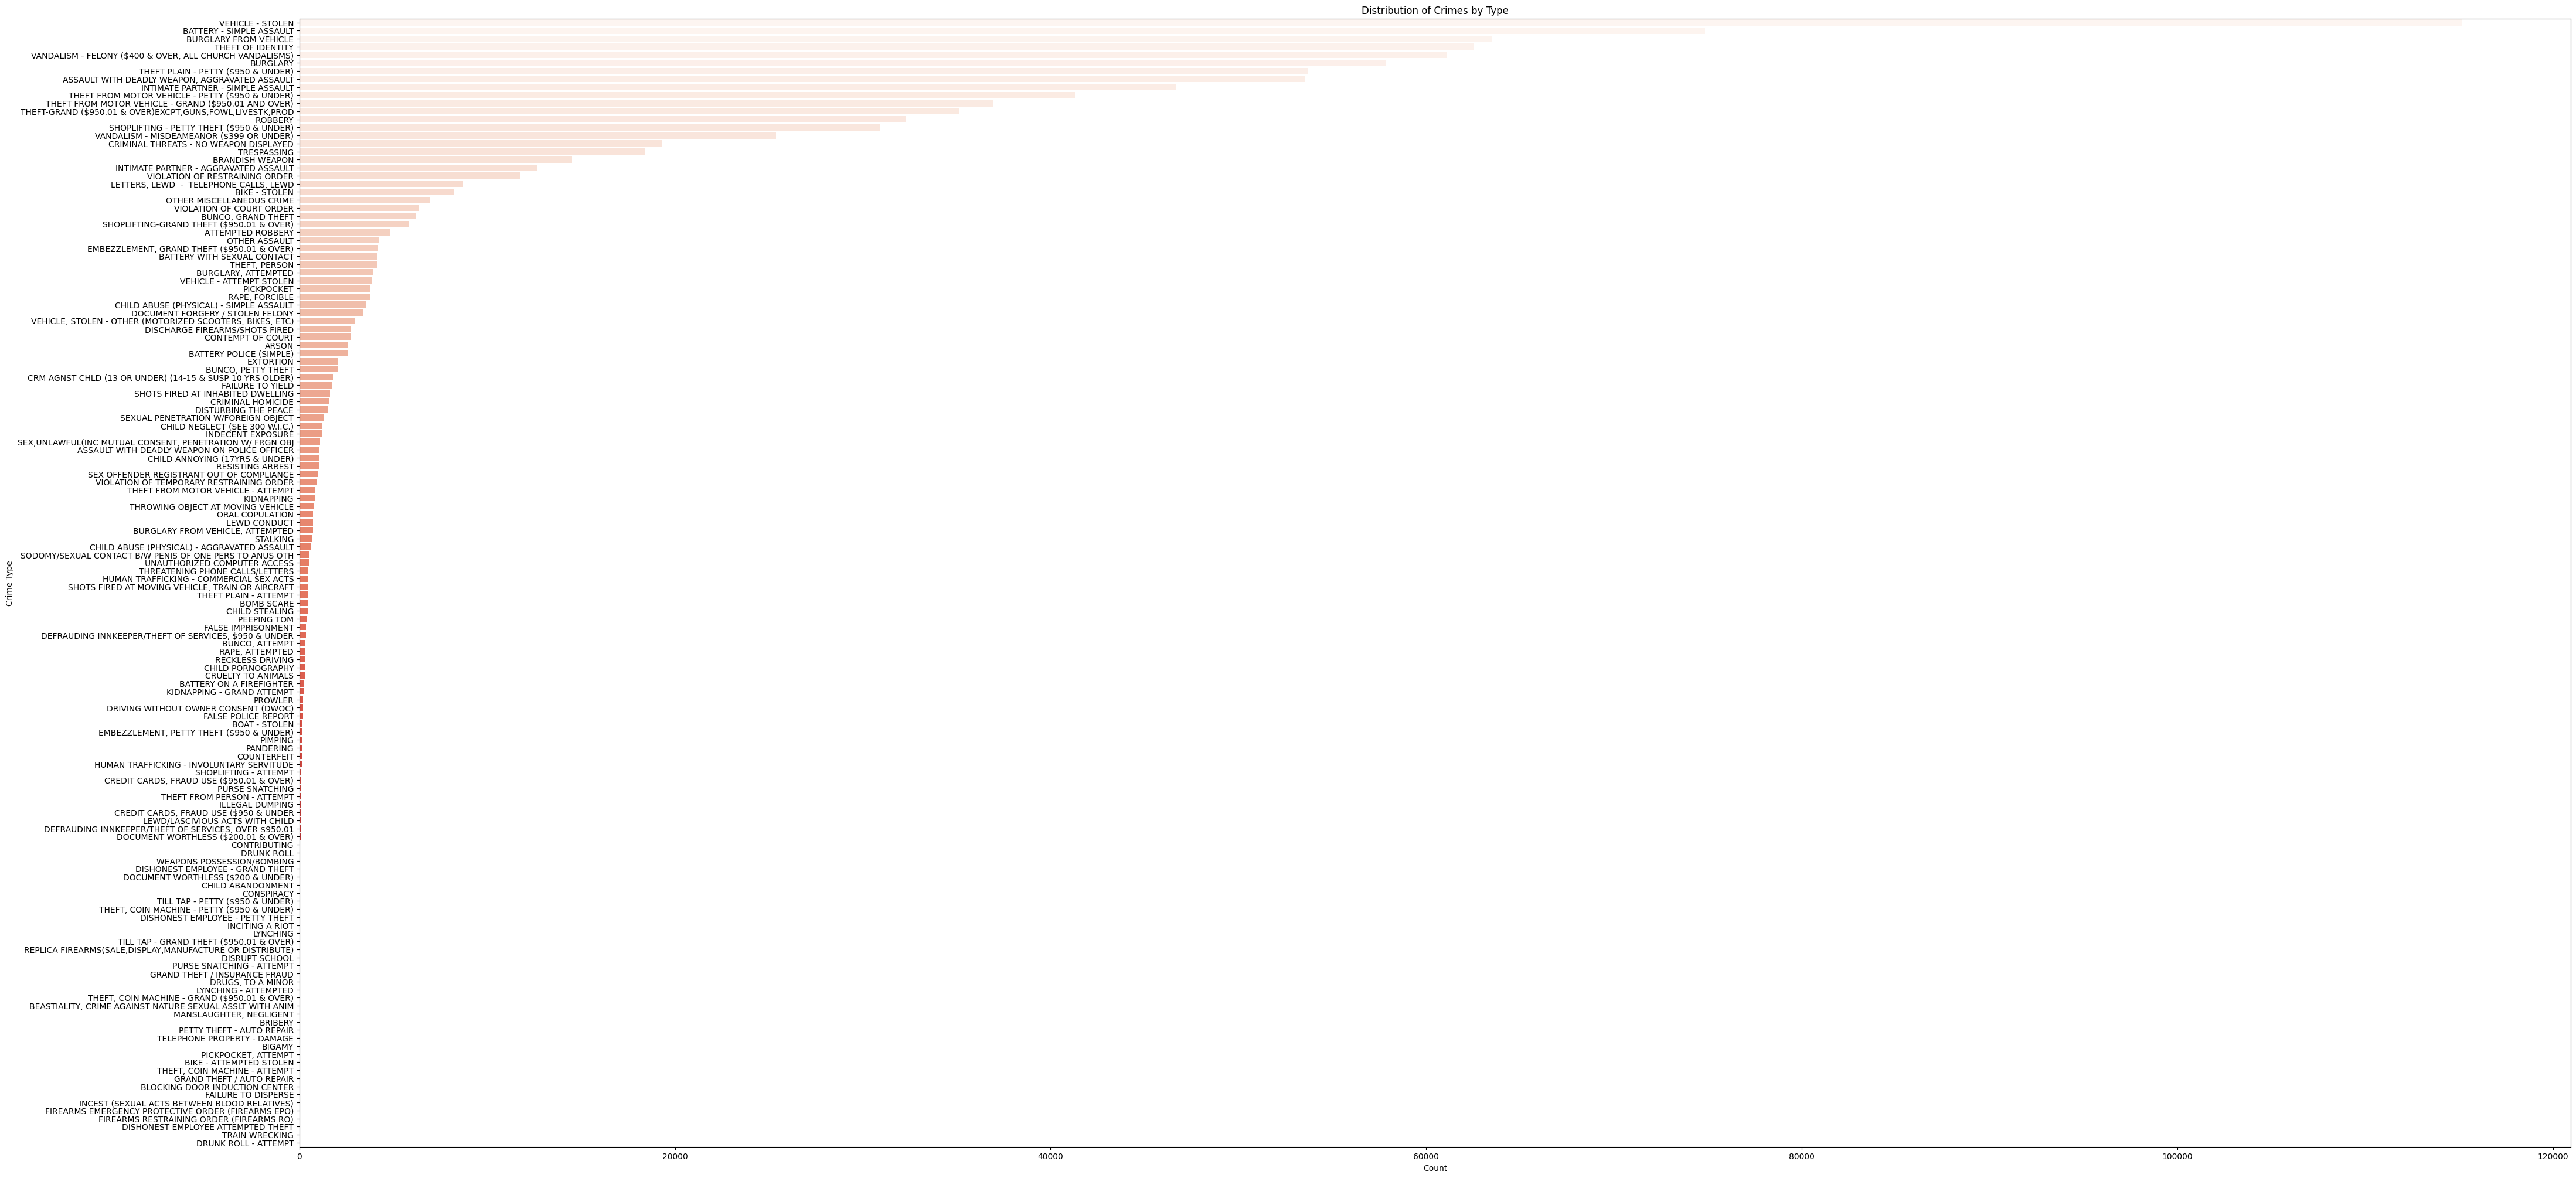

In [35]:
plt.figure(figsize=(50,25))
sns.countplot(data=df, y='Crm Cd Desc', order=df['Crm Cd Desc'].value_counts().index, palette="Reds")
plt.title("Distribution of Crimes by Type")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\1601305260.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




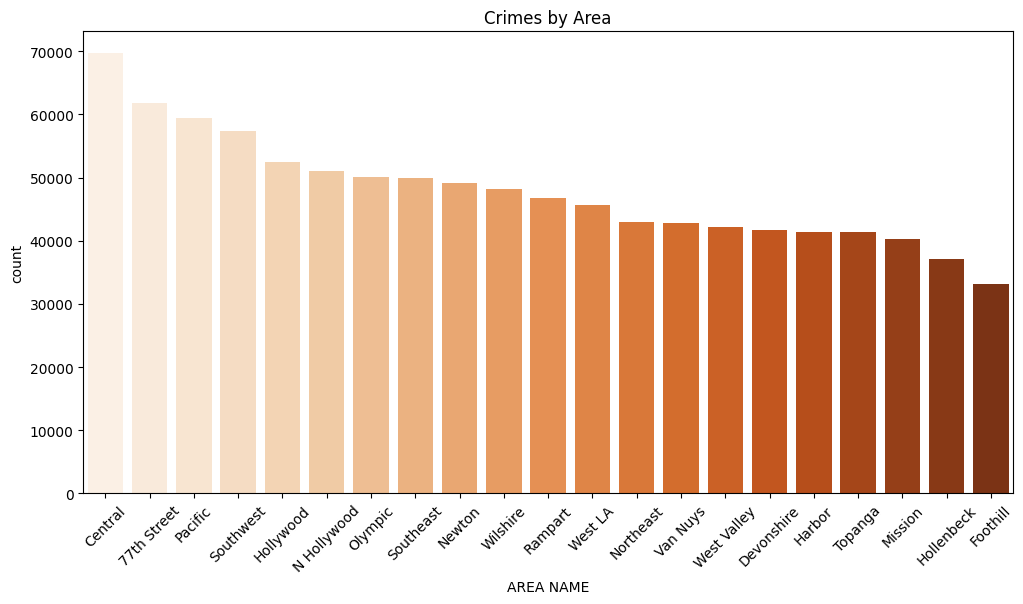

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='AREA NAME', order=df['AREA NAME'].value_counts().index, palette="Oranges")
plt.title("Crimes by Area")
plt.xticks(rotation=45)
plt.show()


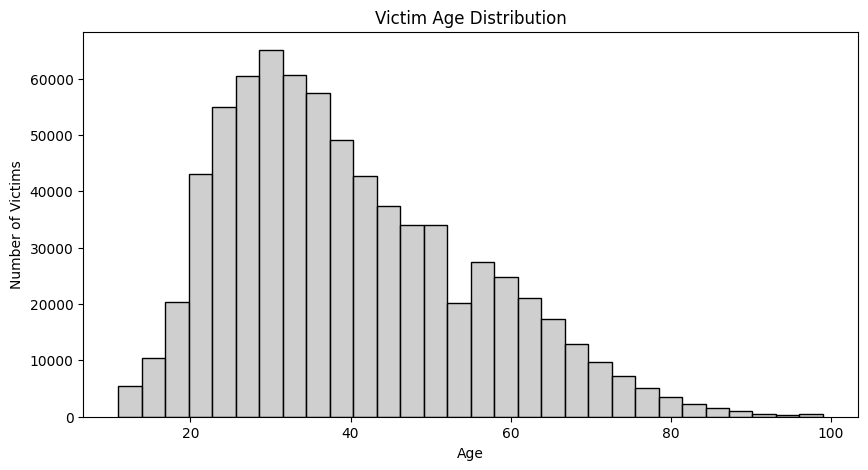

In [37]:
df_age = df[(df['Vict Age'] > 10) & (df['Vict Age'] < 100)]
plt.figure(figsize=(10,5))
sns.histplot(data=df_age, x='Vict Age', bins=30, color="Silver")
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\1988160864.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




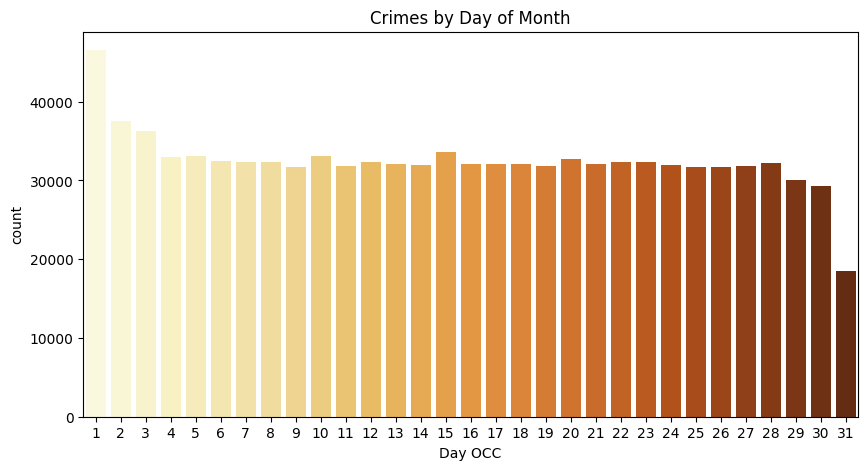

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Day OCC', palette="YlOrBr")
plt.title("Crimes by Day of Month")
plt.show()

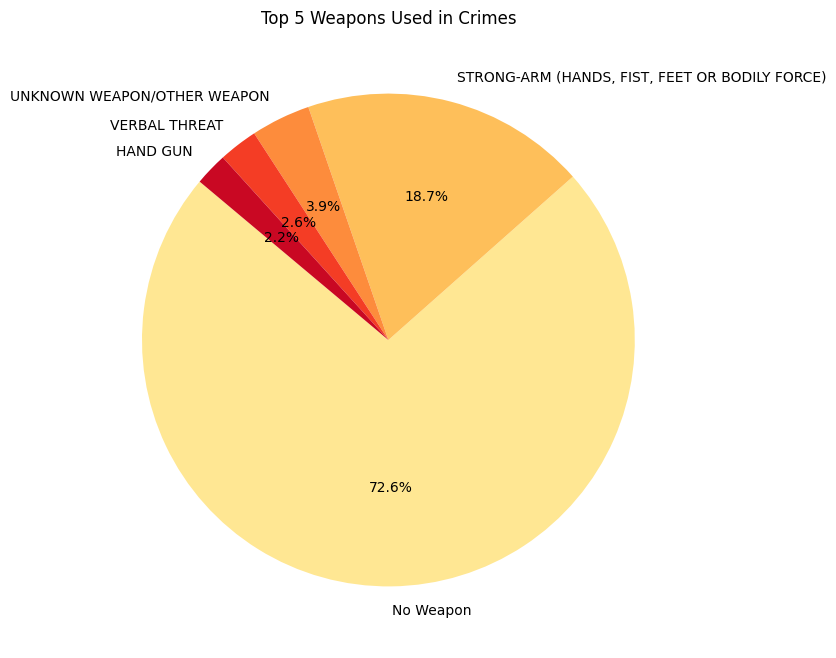

In [31]:
weapon_counts = df['Weapon Desc'].value_counts().head(5)  
plt.figure(figsize=(8,8))
plt.pie(weapon_counts, labels=weapon_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("YlOrRd", len(weapon_counts)))
plt.title("Top 5 Weapons Used in Crimes")
plt.show()

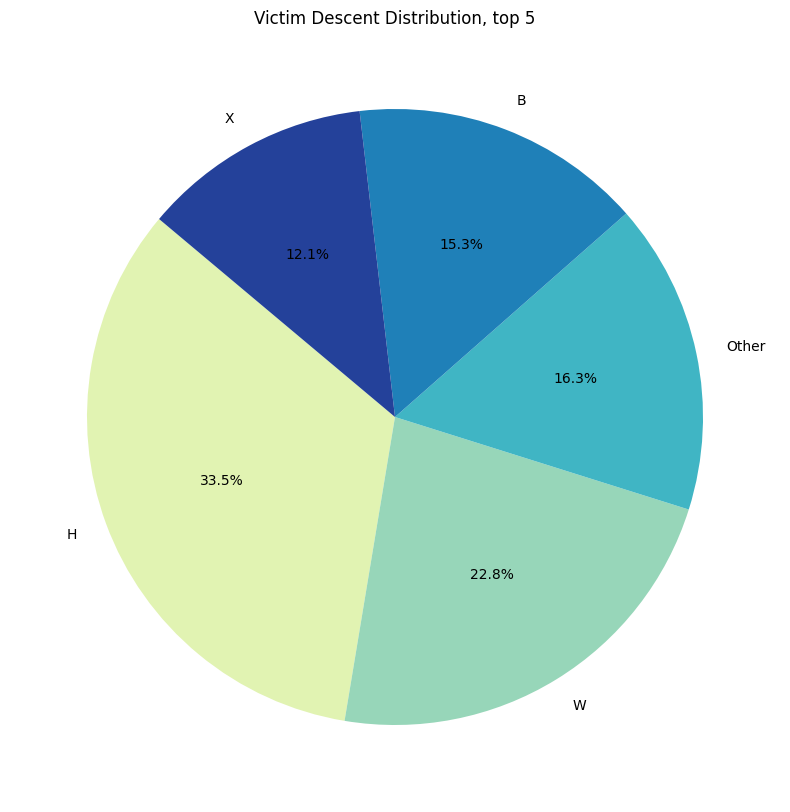

In [25]:
descent_counts = df['Vict Descent'].value_counts().head(5)
plt.figure(figsize=(20,10))
plt.pie(descent_counts, labels=descent_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("YlGnBu", len(descent_counts)))
plt.title("Victim Descent Distribution, top 5")
plt.show()


C:\Users\mena1\AppData\Local\Temp\ipykernel_11196\3561995202.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




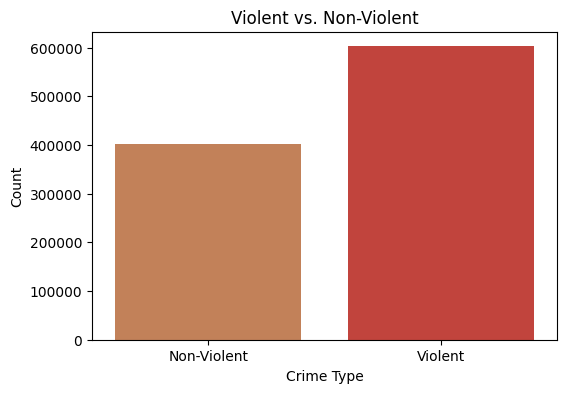

In [30]:
mapping = {1: "Violent", 2: "Non-Violent"}
df['Crime_Type'] = df['Part 1-2'].map(mapping)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Crime_Type', palette=["#d47d47",'#d73027'])  
plt.title('Violent vs. Non-Violent')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()


# Encoding

In [41]:
X_train = X_train.drop('LOCATION', axis=1)
X_test = X_test.drop('LOCATION', axis=1)

In [42]:
X_train.select_dtypes(include='object').columns

Index(['AREA NAME', 'Crm Cd Desc', 'Vict Descent', 'Weapon Desc', 'Status',
       'Status Desc'],
      dtype='object')

In [43]:
#Top features by Random Forest: ['Crm Cd', 'Crm Cd 1', 'Crm Cd Desc', 'Weapon Used Cd', 
# 'Premis Cd', 'Weapon Desc', 'Vict Age', 'Vict Descent', 'Vict Sex', 'Status Desc']
obj_cols = ['Crm Cd Desc', 'Vict Descent',
       'Weapon Desc','Status Desc']

for i in obj_cols:
    le = LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    with open(f"Files/{i}_label_encoder.pkl", "wb") as f:
        pickle.dump(le, f)

In [44]:
obj_cols = ['AREA NAME','Status']

for i in obj_cols:
    le2 = LabelEncoder()
    X_train[i] = le2.fit_transform(X_train[i])
    X_test[i] = le2.transform(X_test[i])

# Heatmap

In [45]:
X_train.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,LON,day_of_week OCC,Year OCC,Month OCC,Day OCC,day_of_week Rptd,Year Rptd,Month Rptd,Day Rptd,Hour OCC
count,8.039700e+05,803970,803970,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,...,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000,803970.000000
mean,2.202218e+08,2022-05-25 22:12:09.107802112,2022-05-13 19:04:49.166013696,1339.807606,10.696397,9.849182,1116.114059,80.663639,28.909033,0.846973,...,-118.092766,3.022250,2021.878750,6.373312,15.346774,2.858046,2021.910046,6.388695,15.578595,13.219756
min,2.203000e+03,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,0.000000,101.000000,0.000000,-4.000000,0.000000,...,-118.667600,0.000000,2020.000000,1.000000,1.000000,0.000000,2020.000000,1.000000,1.000000,0.000000
25%,2.106170e+08,2021-04-21 00:00:00,2021-04-06 00:00:00,900.000000,5.000000,5.000000,587.000000,21.000000,0.000000,0.000000,...,-118.430400,1.000000,2021.000000,3.000000,7.000000,1.000000,2021.000000,3.000000,8.000000,9.000000
50%,2.209162e+08,2022-06-08 00:00:00,2022-05-26 00:00:00,1420.000000,11.000000,10.000000,1141.000000,105.000000,30.000000,1.000000,...,-118.322600,3.000000,2022.000000,6.000000,15.000000,3.000000,2022.000000,6.000000,16.000000,14.000000
75%,2.311103e+08,2023-07-04 00:00:00,2023-06-22 00:00:00,1900.000000,16.000000,15.000000,1615.000000,123.000000,44.000000,1.000000,...,-118.273900,5.000000,2023.000000,9.000000,23.000000,5.000000,2023.000000,9.000000,23.000000,19.000000
max,2.521041e+08,2025-04-29 00:00:00,2025-04-29 00:00:00,2359.000000,21.000000,20.000000,2199.000000,139.000000,99.000000,3.000000,...,0.000000,6.000000,2025.000000,12.000000,31.000000,6.000000,2025.000000,12.000000,31.000000,23.000000
std,1.319066e+07,NaN,NaN,651.327169,6.110089,6.121277,611.138664,50.562444,22.000688,0.907125,...,5.562231,1.986808,1.315072,3.465053,8.950458,1.985571,1.317164,3.462521,8.831524,6.512943


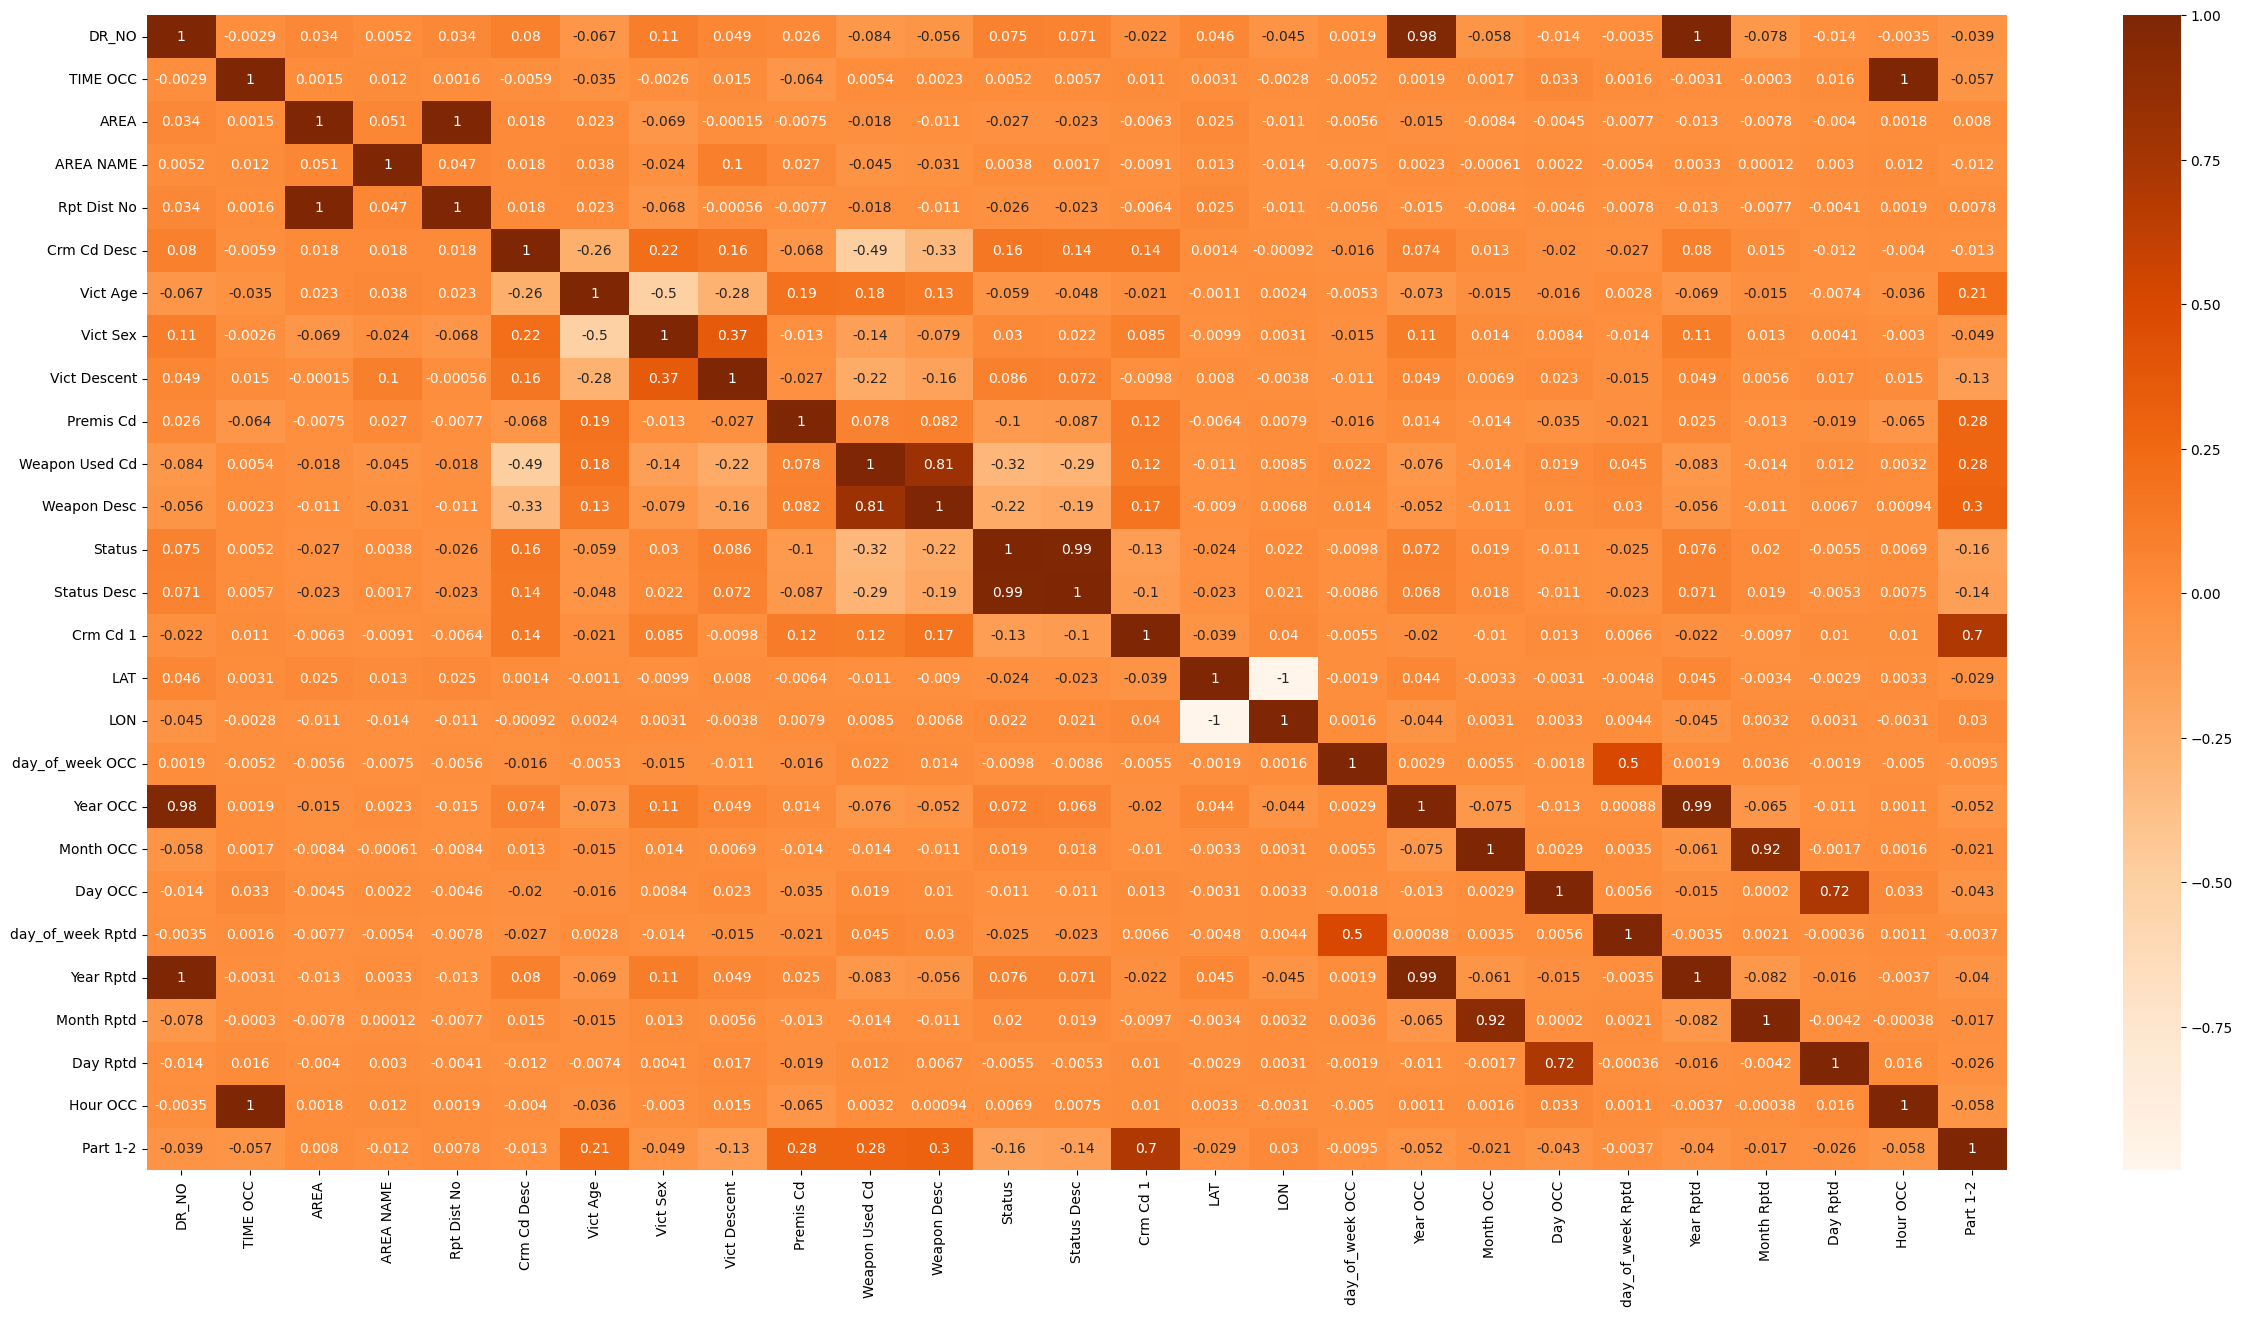

In [ ]:
train_corr = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(train_corr.corr(numeric_only=True), annot=True, cmap='Oranges')
plt.show()

# Feature Extraction

In [47]:
X_train_c = X_train.drop(['Date Rptd','DATE OCC'],axis=1)
X_test_c = X_test.drop(['Date Rptd','DATE OCC'],axis=1)

In [48]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_c, y_train)
importance = pd.Series(rf.feature_importances_, index=X_train_c.columns)
top_features = importance.nlargest(10).index.tolist()
print('Top features by Random Forest:',top_features)

Top features by Random Forest: ['Crm Cd 1', 'Crm Cd Desc', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Vict Age', 'Vict Descent', 'Vict Sex', 'TIME OCC', 'Status Desc']


In [49]:
X_train = X_train[['Crm Cd 1', 'Crm Cd Desc', 'Weapon Used Cd', 'Premis Cd', 'Weapon Desc', 'Vict Age', 'Vict Descent', 'Vict Sex', 'Status Desc']]
X_test = X_test[['Crm Cd 1', 'Crm Cd Desc', 'Weapon Used Cd', 'Premis Cd', 'Weapon Desc', 'Vict Age', 'Vict Descent', 'Vict Sex', 'Status Desc']]

# Handling Outlier 

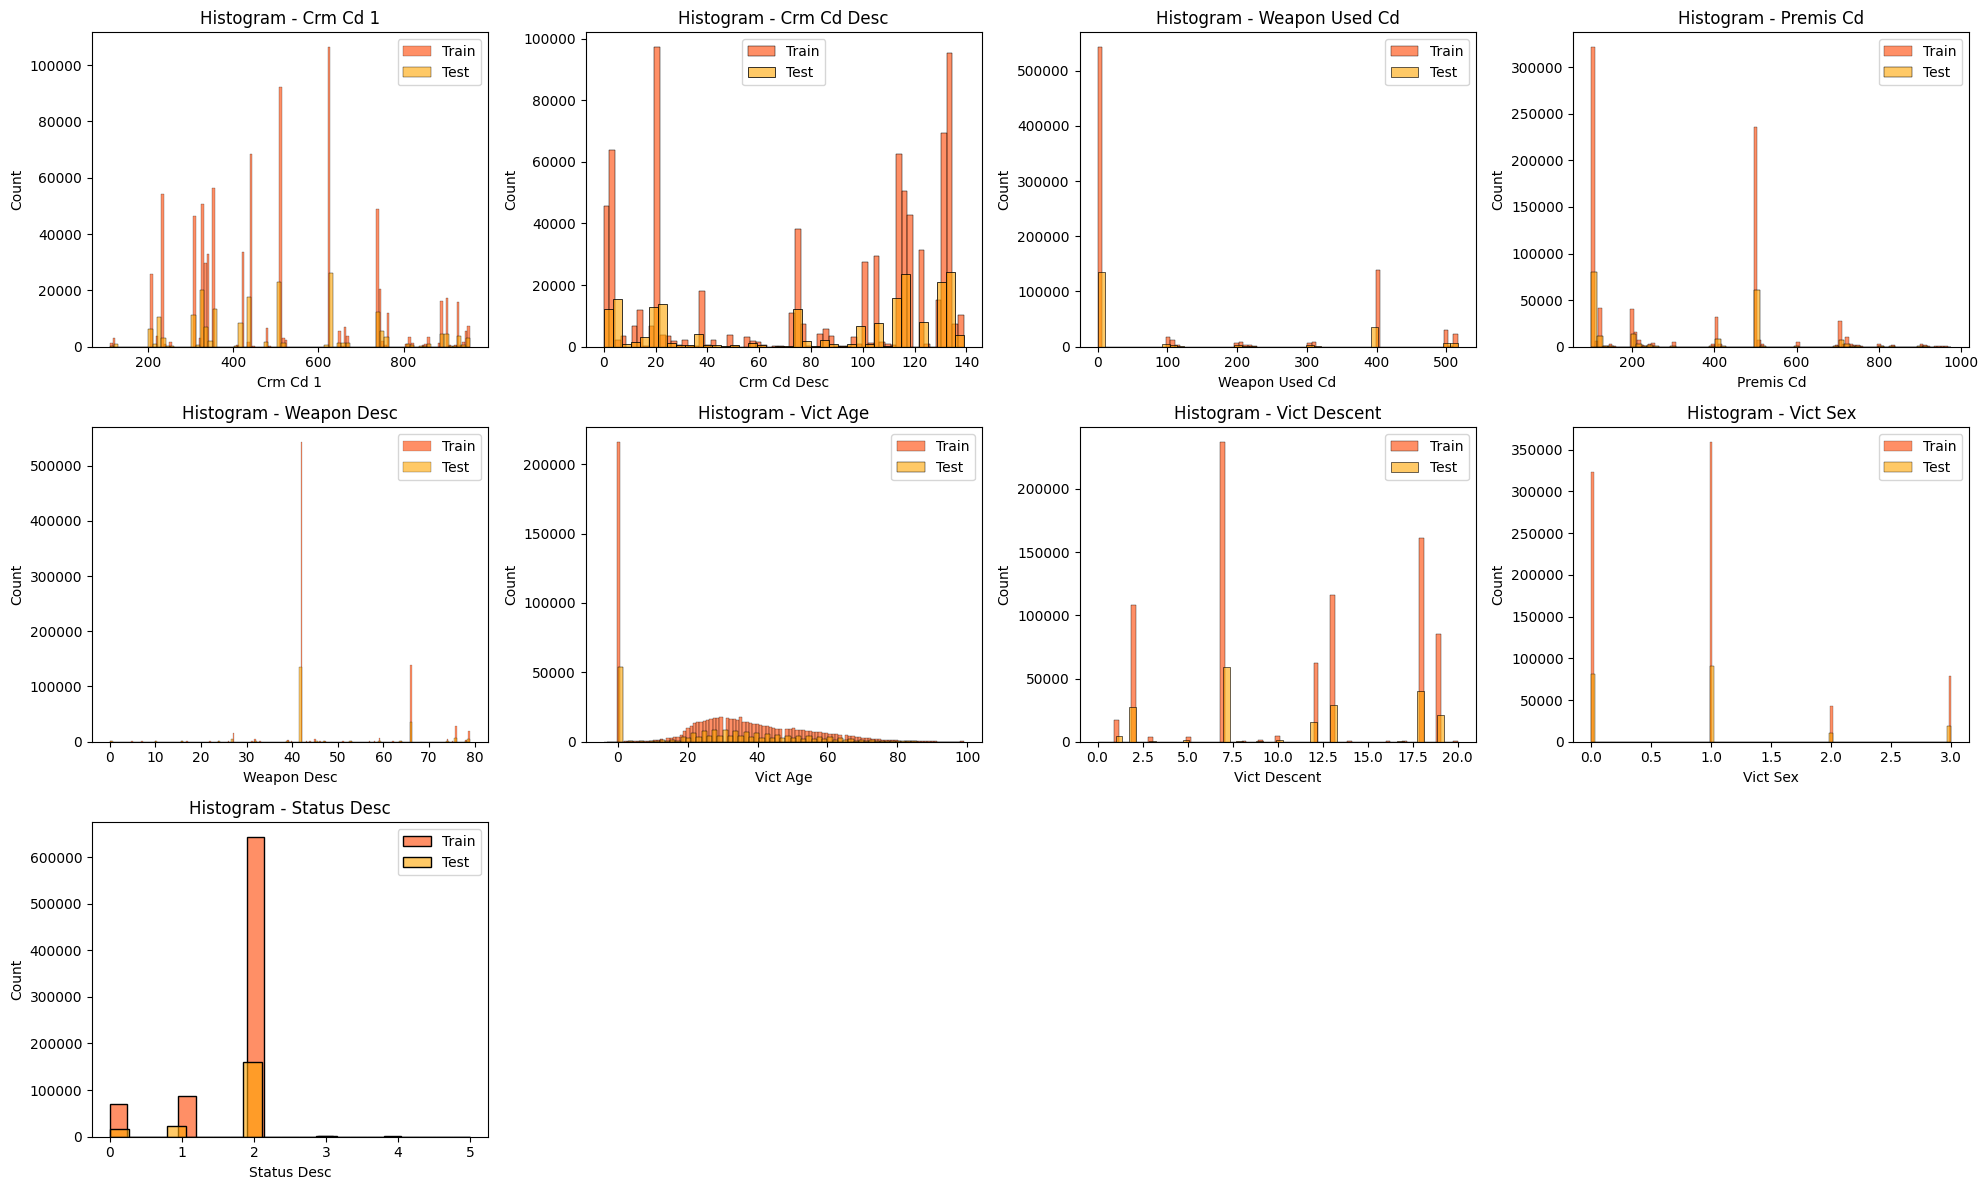

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\AppData\Local\Temp\ipykernel_14076\4208433501.py:20: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\mena1\A

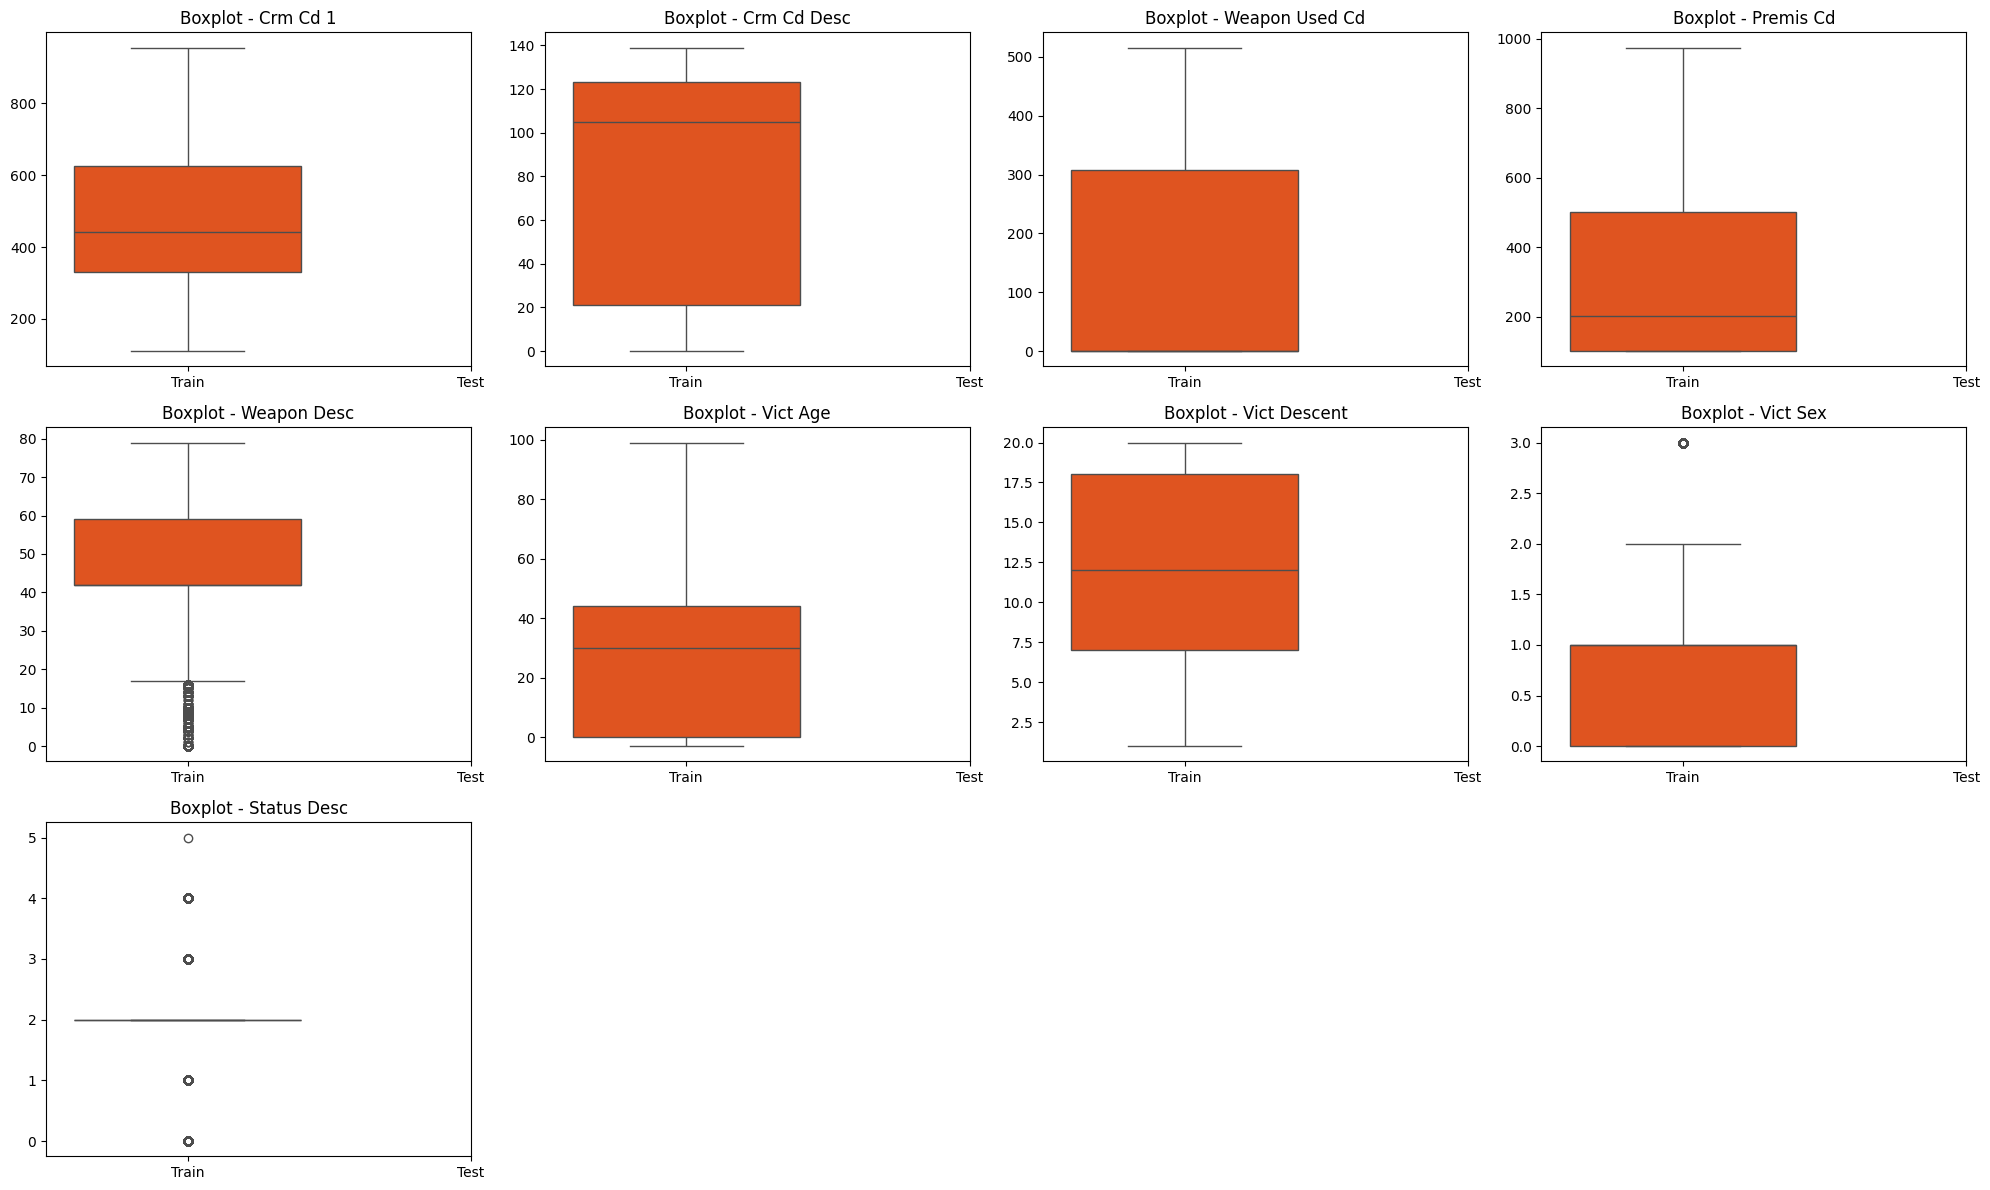

In [50]:
numeric_cols = X_train.columns  
n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

# ================== Histograms ==================
plt.figure(figsize=(20, n_rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=X_train[col], color='orangered', edgecolor='black', label="Train", alpha=0.6)
    sns.histplot(x=X_test[col], color='orange', edgecolor='black', label="Test", alpha=0.6)
    plt.title(f"Histogram - {col}")
    plt.legend()
plt.tight_layout()
plt.show()

# ================== Boxplots ==================
plt.figure(figsize=(20, n_rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(data=[X_train[col], X_test[col]], palette=['orangered', 'orange'])
    plt.xticks([0,1], ['Train', 'Test'])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()


In [51]:
X_train['Vict Age'].value_counts()

Vict Age
 0.0     215716
 30.0     17892
 35.0     17485
 31.0     17140
 29.0     16978
          ...  
 97.0        59
 98.0        59
-2.0         22
-3.0          4
-4.0          3
Name: count, Length: 103, dtype: int64

In [52]:
X_train.loc[X_train['Vict Age'] < 0, 'Vict Age'] = 0
X_test.loc[X_test['Vict Age'] < 0, 'Vict Age'] = 0

iter_imputer2 = IterativeImputer(missing_values=0,max_iter=15 ,random_state=42)
X_train[['Vict Age']] = iter_imputer2.fit_transform(X_train[['Vict Age']])
X_test[['Vict Age']] = iter_imputer2.transform(X_test[['Vict Age']])

with open("Files/Iterative_imputer_Age.pkl", "wb") as f:
    pickle.dump(iter_imputer2, f)

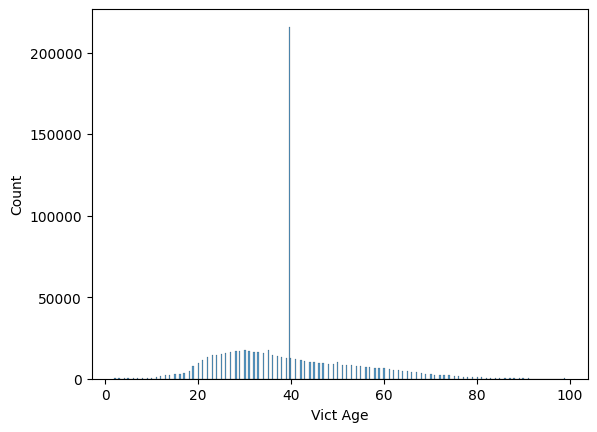

In [53]:
sns.histplot(data=X_train,x='Vict Age')
plt.show()

In [54]:
skew_values = {}
for col in numeric_cols:
    skew_values[col] = skew(X_train[col].dropna())  

skew_df = pd.DataFrame.from_dict(skew_values, orient='index', columns=['Skewness'])

skew_df_sorted = skew_df.sort_values(by='Skewness', ascending=True)

print("Skewness values sorted (closest to normal first):")
print(skew_df_sorted)

print("\nTop 5 columns with lowest skewness:")
print(skew_df_sorted.head(5))

Skewness values sorted (closest to normal first):
                Skewness
Status Desc    -1.801686
Crm Cd Desc    -0.457669
Vict Descent   -0.054288
Crm Cd 1        0.528770
Premis Cd       0.580597
Weapon Desc     0.695255
Vict Age        0.719711
Weapon Used Cd  1.072751
Vict Sex        1.090007

Top 5 columns with lowest skewness:
              Skewness
Status Desc  -1.801686
Crm Cd Desc  -0.457669
Vict Descent -0.054288
Crm Cd 1      0.528770
Premis Cd     0.580597


# Scaling

In [55]:
le_y = LabelEncoder()
y_train_enc = le_y.fit_transform(y_train)
y_test_enc = le_y.transform(y_test)

print("Classes mapping:", dict(zip(le_y.classes_, le_y.transform(le_y.classes_))))

with open('Files/le_y.pkl', 'wb') as f:
    pickle.dump(le_y, f)
print('Done')

Classes mapping: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
Done


In [56]:
y_train

1002297    2
234272     1
851452     1
45969      2
705004     2
          ..
511514     1
133861     1
823325     2
239934     2
429300     2
Name: Part 1-2, Length: 803970, dtype: int64

In [57]:
yeo = ['Weapon Desc','Status Desc','Vict Sex'] #done
normal_dist = ['Crm Cd Desc','Vict Descent'] #done
log = ['Crm Cd 1','Premis Cd'] #done
robust = ['Vict Age','Weapon Used Cd'] #done

In [58]:
yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
X_train[yeo] = yeo_johnson.fit_transform(X_train[yeo])
X_test[yeo] = yeo_johnson.transform(X_test[yeo])

with open('Files/yeo-johnson.pkl', 'wb') as f:
    pickle.dump(yeo_johnson, f)
print('Done')

Done


In [59]:
std = StandardScaler()
X_train[normal_dist] = std.fit_transform(X_train[normal_dist])
X_test[normal_dist] = std.transform(X_test[normal_dist])

with open('Files/StandardScaler.pkl', 'wb') as f:
    pickle.dump(std, f)
print('Done')

Done


In [60]:
X_train[log] = np.log1p(X_train[log])
X_test[log] = np.log1p(X_test[log])

std2 = StandardScaler()
X_train[log] = std2.fit_transform(X_train[log])
X_test[log] = std2.transform(X_test[log])

with open('Files/StandardScaler2.pkl', 'wb') as f:
    pickle.dump(std2, f)
print('Done')

Done


In [61]:
robust_sc = RobustScaler()
X_train[robust] = robust_sc.fit_transform(X_train[robust])
X_test[robust] = robust_sc.transform(X_test[robust])

with open('Files/RobustScaler.pkl', 'wb') as f:
    pickle.dump(robust_sc, f)
print('Done')

Done


In [62]:
with open("Files/X_test.pkl", "wb") as f:
    pickle.dump(X_test, f)

with open("Files/y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

# The Models

In [63]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "GaussianNB": GaussianNB(),

    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=50, 
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100, 
        learning_rate=0.5, 
        random_state=42
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=200, 
        learning_rate=0.1, 
        max_depth=6, 
        random_state=42, 
        use_label_encoder=False, 
        eval_metric="mlogloss",
        verbose=0 
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, 
        learning_rate=0.1, 
        max_depth=-1, 
        random_state=42,
        verbose=0 
    ),
    "CatBoost": CatBoostClassifier(
        iterations=200, 
        learning_rate=0.1, 
        depth=6, 
        random_state=42,
        verbose=0  
    )
}

In [64]:
X_train.columns

Index(['Crm Cd 1', 'Crm Cd Desc', 'Weapon Used Cd', 'Premis Cd', 'Weapon Desc',
       'Vict Age', 'Vict Descent', 'Vict Sex', 'Status Desc'],
      dtype='object')

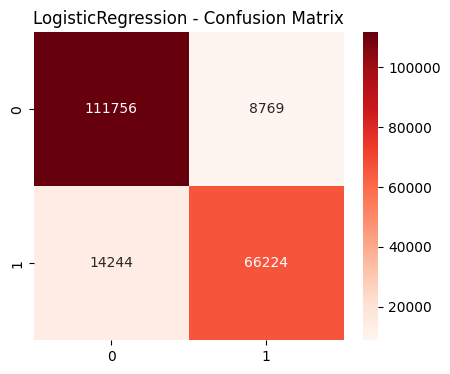

Saving Model 'LogisticRegression' is Done


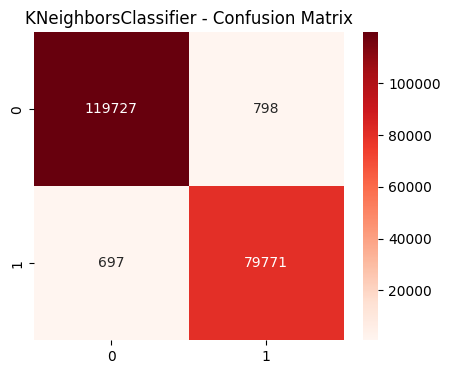

Saving Model 'KNeighborsClassifier' is Done


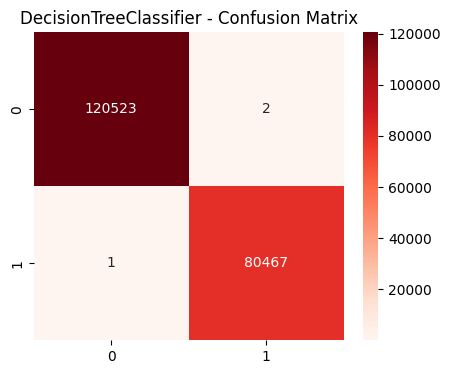

Saving Model 'DecisionTreeClassifier' is Done


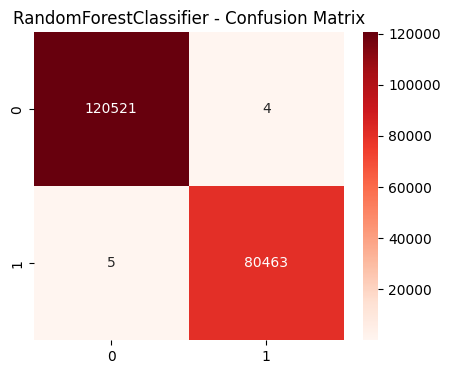

Saving Model 'RandomForestClassifier' is Done


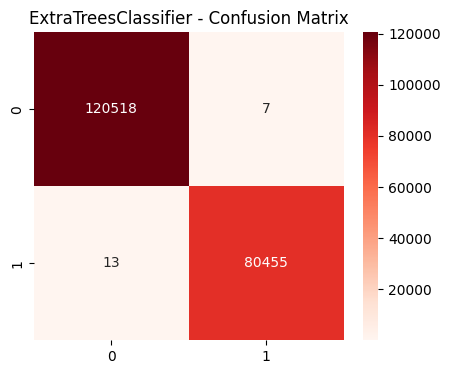

Saving Model 'ExtraTreesClassifier' is Done


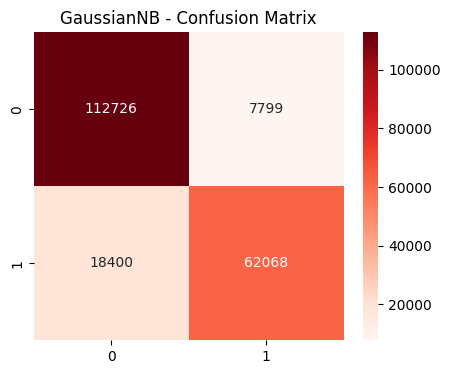

Saving Model 'GaussianNB' is Done


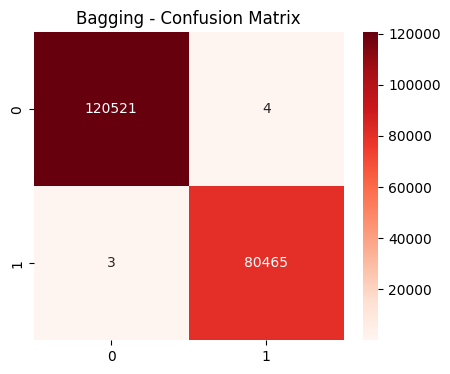

Saving Model 'Bagging' is Done


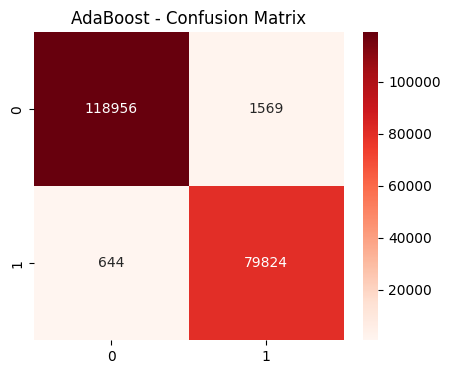

Saving Model 'AdaBoost' is Done


c:\Users\mena1\anaconda3\envs\ml_env313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:09:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder", "verbose" } are not used.




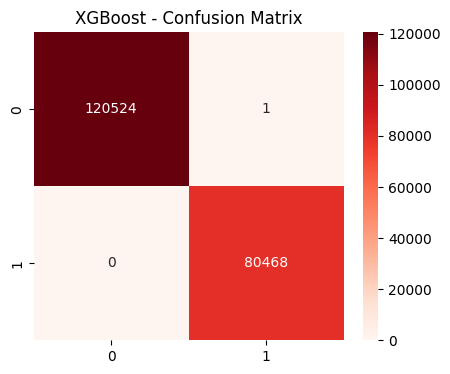

Saving Model 'XGBoost' is Done
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

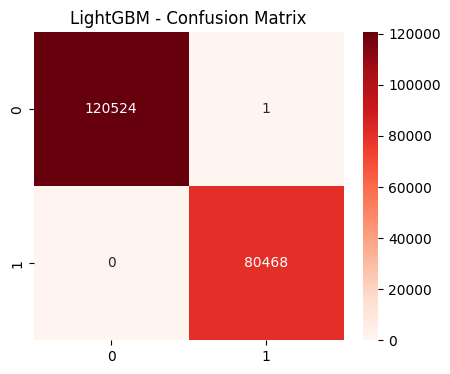

Saving Model 'LightGBM' is Done


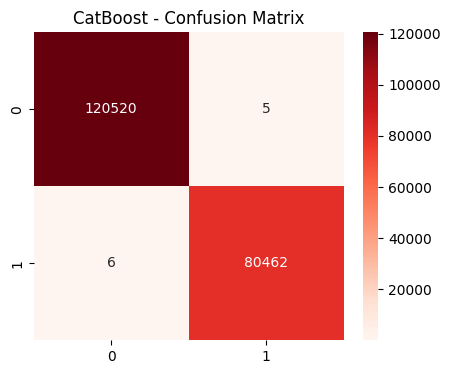

Saving Model 'CatBoost' is Done


In [65]:
metrics_list = []
class_names = [str(c) for c in np.unique(y_test_enc)]
for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test_enc, y_pred)
    pre = precision_score(y_test_enc, y_pred, average='binary')
    rec = recall_score(y_test_enc, y_pred, average='binary')
    f1 = f1_score(y_test_enc, y_pred, average='binary')
    
    metrics_list.append([name, acc, pre, rec, f1])
    
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    filename = f'Files/{name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saving Model '{name}' is Done")

In [67]:
results_df = pd.DataFrame(metrics_list, columns=['Model','Accuracy','Precision','Recall','F1'])
results_df.sort_values('Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.885503,0.883069,0.822986,0.851969
1,KNeighborsClassifier,0.992562,0.990095,0.991338,0.990716
2,DecisionTreeClassifier,0.999985,0.999975,0.999988,0.999981
3,RandomForestClassifier,0.999955,0.999950,0.999938,0.999944
4,ExtraTreesClassifier,0.999900,0.999913,0.999838,0.999876
5,GaussianNB,0.869652,0.888374,0.771338,0.825729
6,Bagging,0.999965,0.999950,0.999963,0.999957
7,AdaBoost,0.988990,0.980723,0.991997,0.986328
8,XGBoost,0.999995,0.999988,1.000000,0.999994
9,LightGBM,0.999995,0.999988,1.000000,0.999994


In [69]:
results_dict = {}

class_names = [str(c) for c in np.unique(y_test_enc)]

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test_enc, y_pred)
    pre = precision_score(y_test_enc, y_pred, average='binary')
    rec = recall_score(y_test_enc, y_pred, average='binary')
    f1 = f1_score(y_test_enc, y_pred, average='binary')
    
    cm = confusion_matrix(y_test_enc, y_pred)
    cls_report = classification_report(y_test_enc, y_pred, output_dict=True)

    results_dict[name] = {
        'metrics': {'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1},
        'confusion_matrix': cm,
        'classification_report': cls_report,
        'class_names': class_names
    }

with open('Files/results_dict.pkl', 'wb') as f:
    pickle.dump(results_dict, f)

print("All results saved to 'Files/results_dict.pkl'")

All results saved to 'Files/results_dict.pkl'
